# **Data Dictionary**

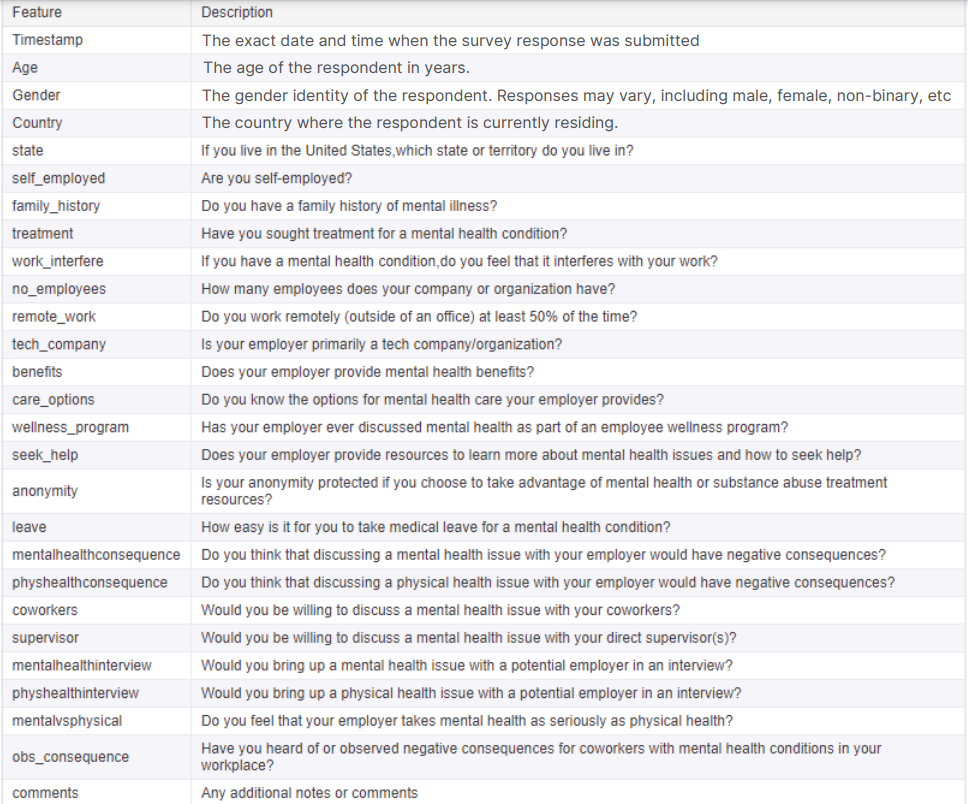


# **Wrangling & EDA**

**1.Loading Packages**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

**2.Loading Data & Basic Analysis**

In [3]:
pip install kaggle


In [4]:
#Upload the Kaggle API token
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hareemfarooq","key":"f3ebf69f4c8976cf4434e4fa6939f794"}'}

In [5]:
#Move the API token to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# List the contents of the .kaggle directory
!ls -a ~/.kaggle

.  ..  kaggle.json


In [6]:
#Downloading the Dataset
!kaggle datasets download -d osmi/mental-health-in-tech-survey

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
License(s): CC-BY-SA-4.0
  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 41.8MB/s]


In [7]:
#Extract and Load the Dataset
!unzip mental-health-in-tech-survey.zip

Archive:  mental-health-in-tech-survey.zip
  inflating: survey.csv              


In [8]:
#Load the dataset into a pandas DataFrame
import pandas as pd
# Load the dataset from the extracted file
mh = pd.read_csv('survey.csv')

In [ ]:
mh


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


**3.Basic Structure**

In [ ]:
mh.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
mh.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [ ]:
mh.shape

(1259, 27)

In [ ]:
mh.index

RangeIndex(start=0, stop=1259, step=1)

In [ ]:
mh.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
mh.dtypes

,0
Timestamp,object
Age,int64
Gender,object
Country,object
state,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object


In [ ]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
mh.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
mh.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Cleaning**

Counts the number of null values ​​(NaN) in each column

---



In [ ]:
mh.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


Percentage of missing values

In [ ]:
100*((mh.shape[0]-mh.count())/mh.shape[0])

,0
Timestamp,0.000000
Age,0.000000
Gender,0.000000
Country,0.000000
state,40.905481
self_employed,1.429706
family_history,0.000000
treatment,0.000000
work_interfere,20.969023
no_employees,0.000000


Missing values are in the following fields

**State** 40% values are missing,

**Self_Employed** 1.4% values are missing,

**Work_Interfere** 21% values are missing,
 and
**Comments** 87% values are missing.






**1.Analysis & Cleaning for fields "State" & "Comments".**

In [ ]:
mh['Country'].value_counts()

,count
Country,
United States,751
United Kingdom,185
Canada,72
Germany,45
Ireland,27
Netherlands,27
Australia,21
France,13
India,10


In [ ]:
mh[mh['Country'] == 'United States']['state'].value_counts().head()


,count
state,
CA,138
WA,70
NY,56
TN,45
TX,44


In [ ]:
mh['state'].mode()


,state
0,CA


In [ ]:
mh[mh['Country'] != 'United States']


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
11,2014-08-27 11:32:49,29,male,Bulgaria,NaN,NaN,No,No,Never,100-500,...,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2015-05-05 15:16:25,32,female,United Kingdom,NaN,No,No,No,NaN,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Yes,No,No,NaN
1245,2015-05-06 10:14:50,22,Male,Australia,NaN,No,Yes,Yes,Often,100-500,...,Don't know,Maybe,Maybe,No,Yes,No,Maybe,Don't know,Yes,In australia all organisations of a certain si...
1247,2015-05-07 10:08:50,36,male,Finland,NaN,No,No,Yes,Often,6-25,...,Very difficult,Yes,No,Some of them,No,No,Maybe,Don't know,Yes,NaN
1251,2015-08-17 09:38:35,36,Male,South Africa,NaN,No,Yes,Yes,Often,100-500,...,Somewhat easy,No,No,Some of them,Yes,No,Yes,Yes,No,NaN


In [ ]:
100 * (mh[mh['Country'] != 'United States'].shape[0] / mh.shape[0])

40.3494837172359

Conclusion for field 'State':

The "State" field has 40% missing values,  where 40% of the data is from outside the United States.

Mode for the 'state' field is California, a location within the United States.

Therefore, it wouldn't be appropriate to replace missing values in the 'state' column for different countries oustide of US with 'California'. Hence, the vialable solution is to drop the column 'State'.

In [ ]:
mh['comments'].value_counts()

,count
comments,
* Small family business - YMMV.,5
I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.,1
(yes but the situation was unusual and involved a change in leadership at a very high level in the organization as well as an extended leave of absence),1
None of us who are already in marginal groups in tech--the non-young the non-male the non-white--will risk our careers to admit another source of stigma: poor health.,1
I have been incredibly public about my own struggle in my own conversations and in social media insofar as how I can use my depression to raise awareness or help others. Because of that my employer - or any future employer - kind of knows by default. It's not a secret. That said the downside of that openness is that I have no faith that I wouldn't be discriminated against at a future job simply because the information is public. Likewise I worry I'm seen as less-than by my employer in some circumstances. Regerdless I don't regret being public and raising awareness. My point is that even those of us who do publicly discuss the issue fear systemic retribution.,1
...,...
In Germany your employer doesn't really provide mental health benefits. There's a standard and I get that but I would get the same at any other company in Germany.,1
fwiw I am a co founder of this company and the would you X in an interview questions shouldn't reflect how I would treat anyone addressing their own phys/mental health issue to me in such a situation.,1
I talked to a psychiatrist once about taking medical leave for mental health issues with his referral. He was willing to help but warned me that I may not want to as he's seen that sort of thing follow people throughout their tech careers (word gets out even if it's confidential at work). I've been terrified of bringing mental health up anywhere that coworkers or potential employers could see ever since.,1


In [12]:
#Dropping the 'State' & 'Comments' fields due to high percenatge of missing values
mh.drop(['state','comments'], axis=1, inplace = True)

**2.Analysis & Cleaning for fields 'Self_Employed' and 'Work_Interference**

In [ ]:
mh['self_employed'].value_counts()


,count
self_employed,
No,1095
Yes,146


In [ ]:
mh['work_interfere'].value_counts()


,count
work_interfere,
Sometimes,465
Never,213
Rarely,173
Often,144


In [ ]:
#Correction for the Missing values
#Self_employed - 1.4% values are missing, replace with mode
#Work_interfere - 21% values are missing, replace with mode
mh['self_employed'].mode()[0]

In [16]:
mh['self_employed'] = mh['self_employed'].replace(np.nan, mh['self_employed'].mode()[0])
mh['work_interfere'] = mh['work_interfere'].replace(np.nan, mh['work_interfere'].mode()[0])

In [ ]:
100*((mh.shape[0]-mh.count())/mh.shape[0])

,0
Timestamp,0.0
Age,0.0
Gender,0.0
Country,0.0
self_employed,0.0
family_history,0.0
treatment,0.0
work_interfere,0.0
no_employees,0.0
remote_work,0.0


In [ ]:
mh.duplicated().any()
print('Contains any Duplicated rows ?', mh.duplicated().any())

Contains any Duplicated rows ? False


**3.Analysis & Cleaning for field 'Age'**

In [ ]:
mh.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


Incorrect values in Age:

Max Age of a person cannot be 100,000,000,000.00 and also no person would have an age of neagtive -17.26.
Since most countries designate 18 years as the legal age to commence work, let's examine the "Age field" for any records below this threshold.

In [ ]:
mh[mh['Age']<18]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


Similarly, let's assess the "Age field" for individuals within a maximum age range of approximately 70 years.

In [ ]:
mh[mh['Age']>75]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


Substituting the outliers in the Age field with the median value, as median is not influenced by the outliers.

In [18]:
#Fixing Outliers in Field 'Age'
mh['Age'].median()

31.0

In [19]:
mh.loc[mh['Age'] > 75, 'Age'] = mh['Age'].median()
mh.loc[mh['Age'] < 18, 'Age'] = mh['Age'].median()

In [20]:
mh['Age'].describe()

,Age
count,1259.000000
mean,32.069897
std,7.265565
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


**4.Formatting of field 'Timestamp'**

In [ ]:
mh['Timestamp'].unique()

array(['2014-08-27 11:29:31', '2014-08-27 11:29:37',
       '2014-08-27 11:29:44', ..., '2015-11-07 12:36:58',
       '2015-11-30 21:25:06', '2016-02-01 23:04:31'], dtype=object)

In [ ]:
mh['Timestamp'] = pd.to_datetime(mh['Timestamp'])

In [ ]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   self_employed              1259 non-null   object        
 5   family_history             1259 non-null   object        
 6   treatment                  1259 non-null   object        
 7   work_interfere             1259 non-null   object        
 8   no_employees               1259 non-null   object        
 9   remote_work                1259 non-null   object        
 10  tech_company               1259 non-null   object        
 11  benefits                   1259 non-null   object        
 12  care_o

**5.Analysis & Cleaning for field 'Gender'**

In [ ]:
#unique values in the Gender field

print('Unique Genders present in the data :', mh['Gender'].nunique())
print('Unique Genders present in the data :', set(mh['Gender']))

Unique Genders present in the data : 49
Unique Genders present in the data : {'fluid', 'something kinda male?', 'Male (CIS)', 'p', 'maile', 'femail', 'non-binary', 'A little about you', 'Femake', 'Male ', 'woman', 'Female', 'Cis Male', 'Neuter', 'M', 'Mal', 'cis male', 'male leaning androgynous', 'Agender', 'Cis Man', 'ostensibly male, unsure what that really means', 'f', 'Malr', 'male', 'queer', 'm', 'queer/she/they', 'F', 'Woman', 'Nah', 'Female (cis)', 'Female (trans)', 'female', 'Trans-female', 'Mail', 'Guy (-ish) ^_^', 'Trans woman', 'Cis Female', 'Male-ish', 'Androgyne', 'msle', 'Male', 'cis-female/femme', 'Man', 'All', 'Genderqueer', 'Make', 'Enby', 'Female '}


In [ ]:
mh['Gender'].str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
unique_gender = mh['Gender'].str.lower().unique()

#Gender category
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make",
            "male ", "man","msle", "mail", "malr","cis man", "Cis Male",
            "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they",
             "non-binary","nah", "all", "enby", "fluid", "genderqueer",
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^",
             "trans woman", "neuter", "female (trans)", "queer",
             "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ",
              "cis-female/femme", "female (cis)", "femail"]

In [ ]:
# Iterate over rows and replace the inconsistent data with right data
for (row, col) in mh.iterrows():
    if str.lower(col['Gender']) in male_str:
        mh['Gender'].replace(to_replace=col['Gender'], value='male', inplace=True)

    if str.lower(col['Gender']) in female_str:
        mh['Gender'].replace(to_replace=col['Gender'], value='female', inplace=True)

    if str.lower(col['Gender']) in trans_str:
        mh['Gender'].replace(to_replace=col['Gender'], value='trans', inplace=True)

In [ ]:
# Remove rest of the unnecessary text
stk_list = ['A little about you', 'p']
mh = mh[~mh['Gender'].isin(stk_list)]

In [ ]:
# Display the unique value in 'Gender' field
print(mh['Gender'].unique())

['female' 'male' 'trans']


# **Analytical Questions**

**1.What is the average age of respondents who have sought treatment for a mental health condition?**

In [10]:
mh[mh['treatment'] == 'Yes']['Age'].mean()

156985901.43956044

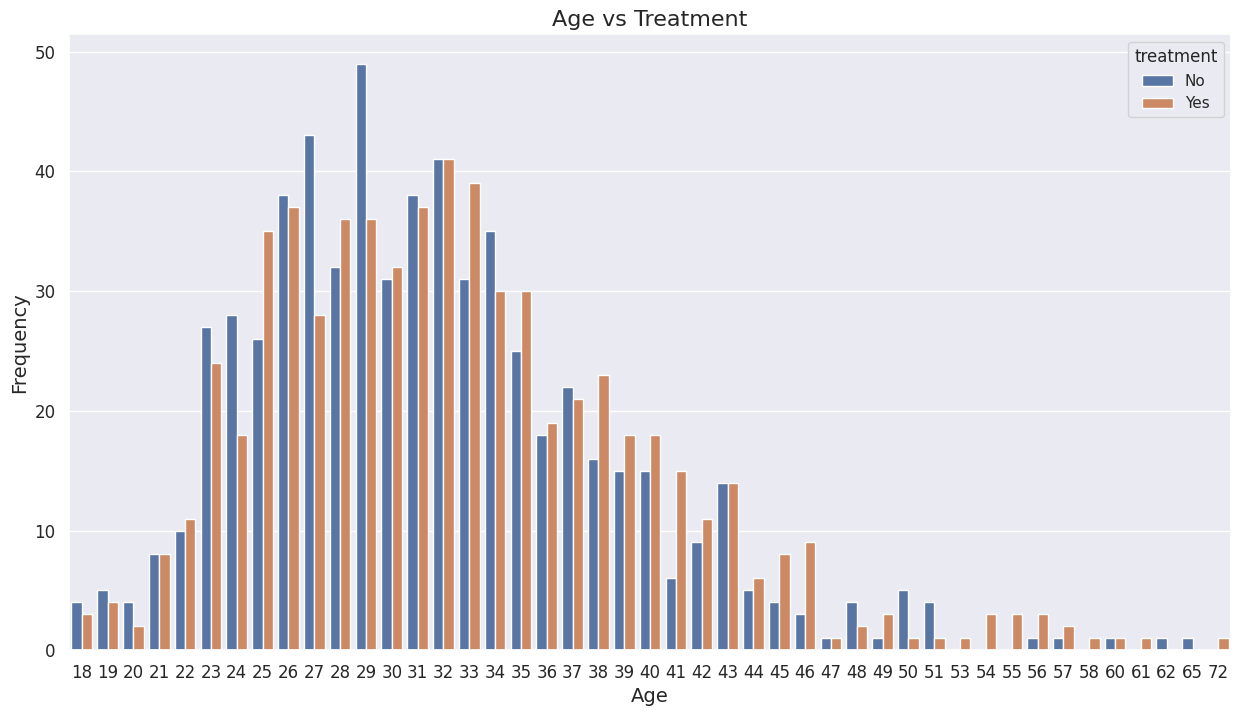

In [21]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='treatment', data=mh)

plt.title(label='Age vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.grid(b=True)

plt.show()

Analyzing the proportions, it suggests that individuals over the age of 30 are addressing their mental health concerns.

In [ ]:
mh['treatment'].value_counts()

,count
treatment,
Yes,635
No,622


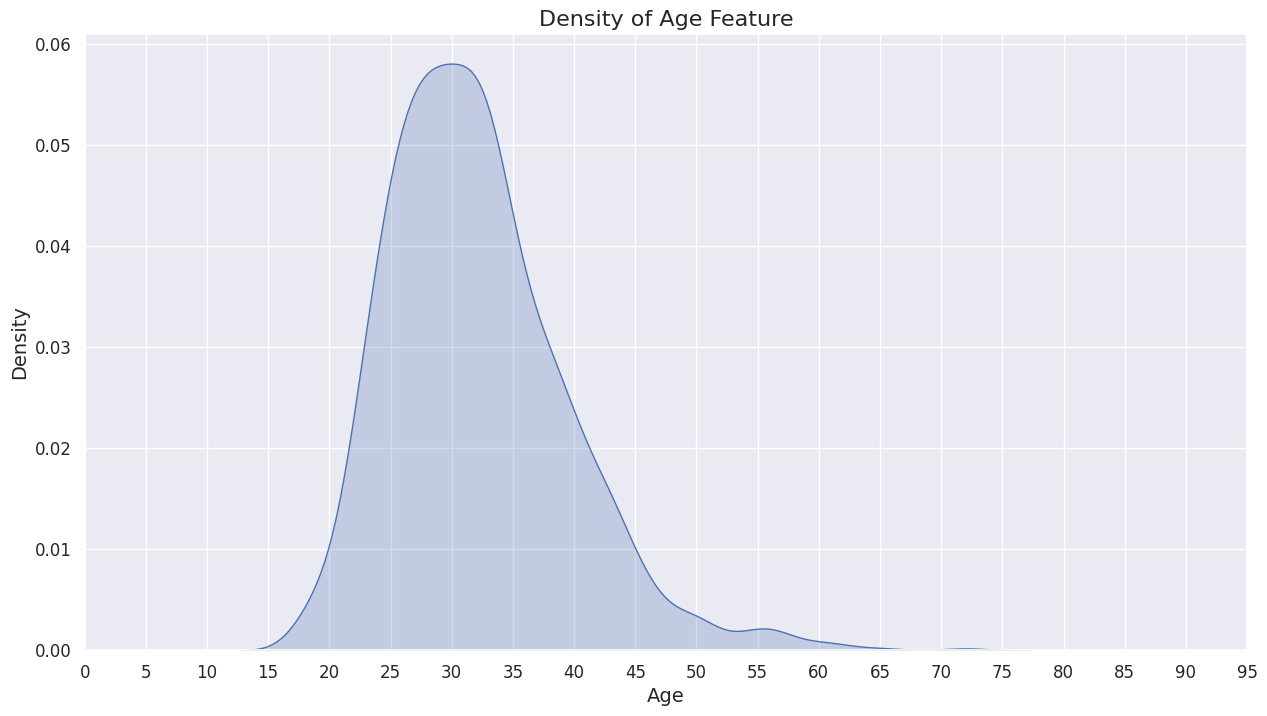

In [ ]:
figure = plt.figure(figsize=[15, 8])

sns.kdeplot(mh['Age'], fill=True)

plt.xticks(ticks=np.arange(0, 100, 5), size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.title(label='Density of Age Feature', size=16)
plt.show()

Density distribution helps to identify which age groups are most represented in the survey.The data shows a prominent peak occurring between the mid-20s to about mid-30s, indicating that the majority of individuals fall within this age range.

**Insight: Individuals over 30 are actively addressing their mental health concerns, with a peak in representation between the mid-20s to mid-30s. This suggests that most survey participants are concentrated in this age range.**

**2.What is the association between treatment and employee count and distribution of mental health benefits provided to employee's across different company sizes?**


In [ ]:
mh['treatment'].value_counts()


,count
treatment,
Yes,635
No,622


In [ ]:
mh['no_employees'].value_counts()

,count
no_employees,
6-25,290
26-100,289
More than 1000,282
100-500,176
1-5,160
500-1000,60


In [ ]:
mh[mh['treatment'] == 'Yes']['no_employees'].value_counts()

,count
no_employees,
26-100,150
More than 1000,146
6-25,128
100-500,95
1-5,89
500-1000,27


In [ ]:
mh[mh['treatment'] == 'No']['no_employees'].value_counts()

,count
no_employees,
6-25,162
26-100,139
More than 1000,136
100-500,81
1-5,71
500-1000,33


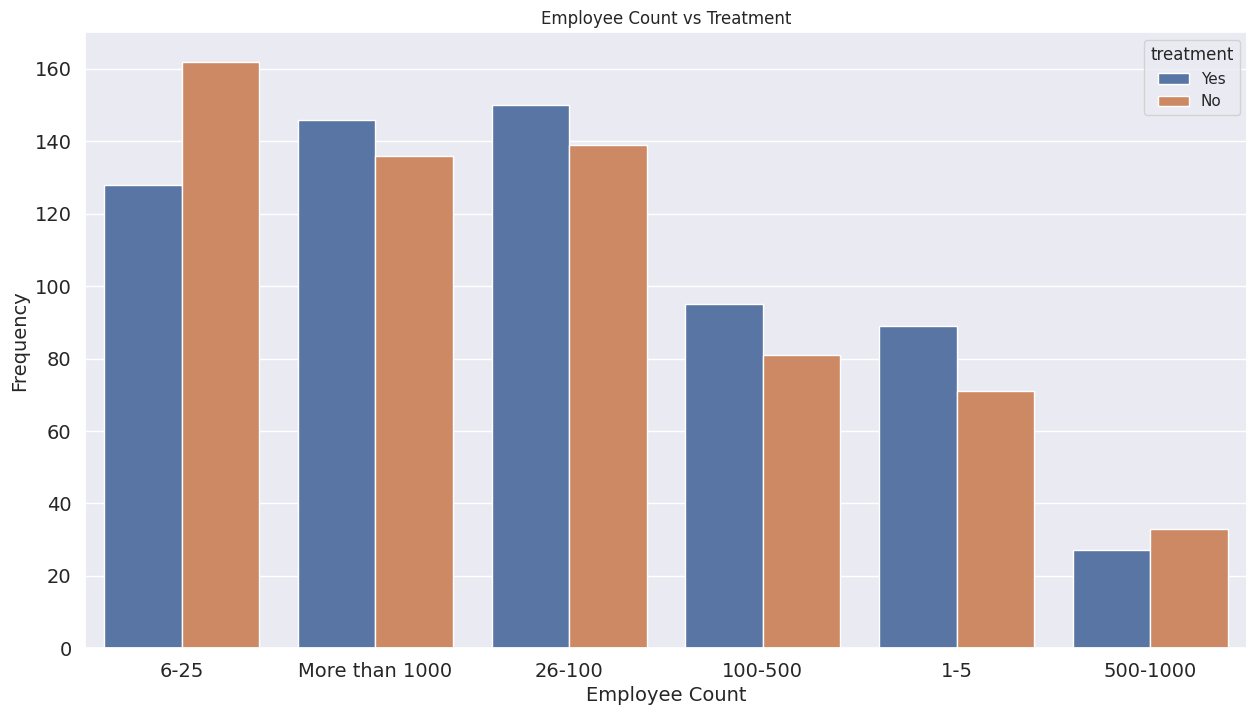

In [ ]:
figure = plt.figure(figsize=[15, 8])

sns.countplot(x = 'no_employees', hue ='treatment', data=mh)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Employee Count', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Employee Count vs Treatment', size=12)
plt.show()

Based on the data, mental health treatment sought by belong to companies sized between 26-100 employees compared to not sought by sized between 6-25 employees.

In [ ]:
percentage_benefits = mh.groupby('no_employees')['benefits'].value_counts(normalize=True).unstack() * 100
percentage_benefits = percentage_benefits.round(2)
print(percentage_benefits)

benefits        Don't know     No    Yes
no_employees                            
1-5                  20.00  69.38  10.62
100-500              36.93  18.18  44.89
26-100               39.45  25.61  34.95
500-1000             35.00   6.67  58.33
6-25                 33.79  45.52  20.69
More than 1000       27.66   7.45  64.89


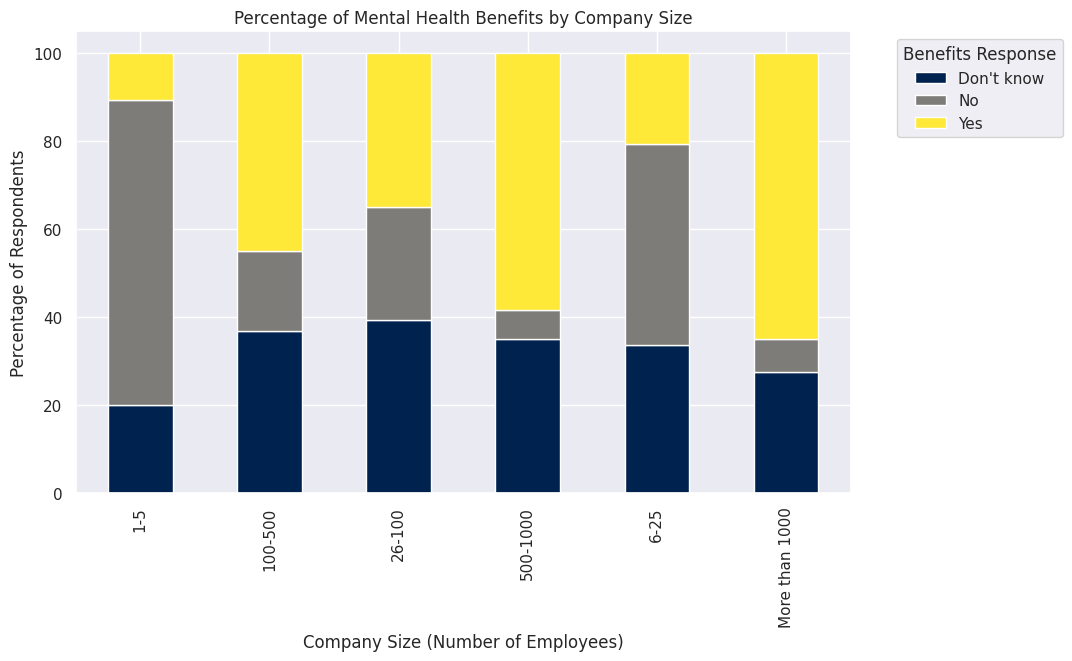

In [ ]:
percentage_benefits.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='cividis')
plt.title('Percentage of Mental Health Benefits by Company Size')
plt.xlabel('Company Size (Number of Employees)')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Benefits Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Larger companies tend to have more employees who confirm the availability of mental health support benefits whereas smaller companies have more employees who are either unsure about or lack mental health benefits.

**Insight: Employees from companies with 26-100 employees are more likely to seek mental health treatment, indicating better support in these larger firms. In contrast, smaller companies (6-25 employees) often have employees who are unsure about or lack mental health benefits.**

**3.How does the percentage of employees who have received mental health treatment compare across the top 10 countries with the most survey responses?**


Top 10 Countries by Treatment Ratio (%):
Country
New Zealand       62.500000
Australia         61.904762
United States     54.533333
Canada            51.388889
United Kingdom    50.270270
Ireland           48.148148
Germany           46.666667
Netherlands       33.333333
India             30.000000
France            15.384615
Name: count, dtype: float64


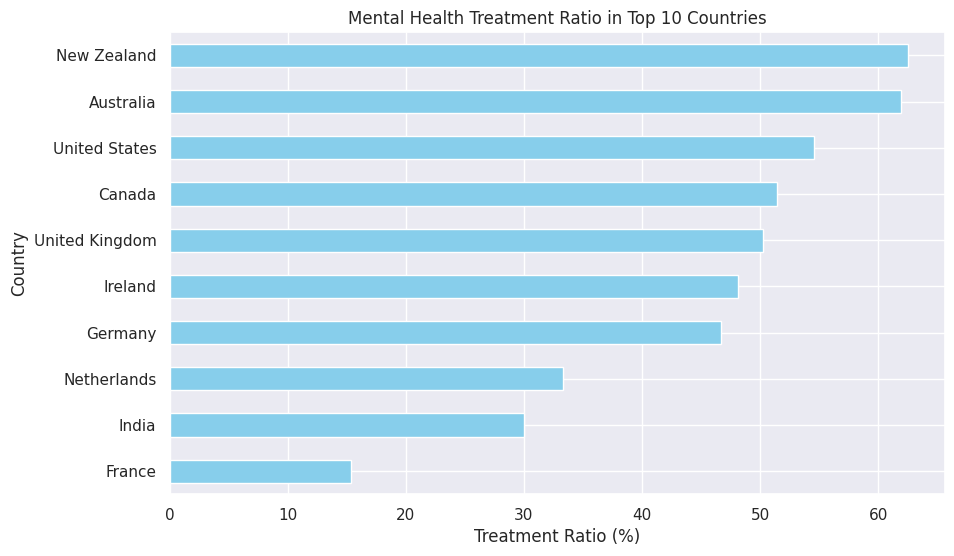

In [ ]:
# Step 1: Calculate the number of respondents who reported receiving treatment for mental health issues in each country
treated_count = mh[mh['treatment'] == 'Yes']['Country'].value_counts()

# Step 2: Calculate the total number of respondents from each country
total_count = mh['Country'].value_counts()

# Step 3: Compute the ratio of treated cases to the total cases for each country
treatment_ratio = (treated_count / total_count) * 100

# Step 4: Get the top 10 countries with the highest number of responses
top_10_countries = total_count.nlargest(10).index

# Step 5: Filter the treatment_ratio to include only the top 10 countries
top_10_treatment_ratio = treatment_ratio[top_10_countries]

# Step 6: Display the results
print("Top 10 Countries by Treatment Ratio (%):")
print(top_10_treatment_ratio.sort_values(ascending=False))

#Visualize the results using a bar chart
top_10_treatment_ratio.sort_values(ascending=True).plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Mental Health Treatment Ratio in Top 10 Countries')
plt.xlabel('Treatment Ratio (%)')
plt.ylabel('Country')
plt.show()


New Zealand & Australia top the list, followed by United States & Canada prioritize to address mental health issuesconsidering the total number of reported issues.

Determine how New Zealand and Australia compare with the United States, Uk, Germany and Canada in terms of addressing mental health issues relative to the total number of reported issues

          Country  Proportion
0       Australia    0.619048
1          Canada    0.513889
2         Germany    0.466667
3     New Zealand    0.625000
4  United Kingdom    0.502703
5   United States    0.545333


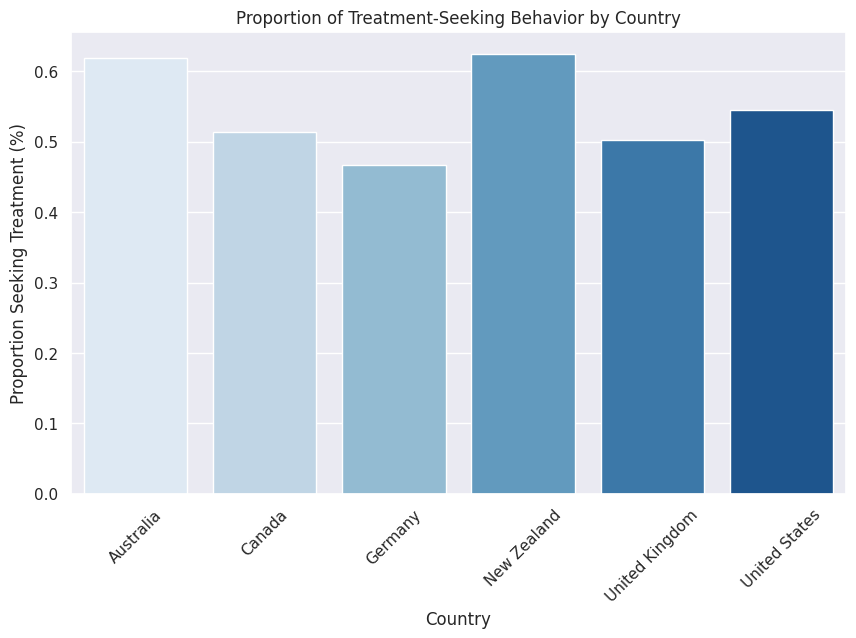

In [ ]:
# Filter data for the top 4 countries and the other 2 countries
top_4_countries = ['United States', 'United Kingdom', 'Canada', 'Germany']
other_2_countries = ['New Zealand', 'Australia']

# Calculate the proportion of population addressing mental health issues
# for each country
proportions = mh[mh['Country'].isin(top_4_countries + other_2_countries)]
proportions = proportions.groupby('Country').apply(
    lambda x: (x['treatment'] == 'Yes').sum() / len(x)
).reset_index(name='Proportion')

# Output the proportions for comparison
print(proportions)

# Plotting the proportion of treatment-seekers for each country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Proportion', data=proportions, hue='Country', palette='Blues', dodge=False)
plt.title('Proportion of Treatment-Seeking Behavior by Country')
plt.xlabel('Country')
plt.ylabel('Proportion Seeking Treatment (%)')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)
plt.show()

Compare treatment-seeking behavior and reported mental health issues between New Zealand, Australia, and the USA, Uk and Canada.

          Country  total_issues  treatment_seekers  Seeking Treatment (%)  \
0       Australia            21                 13              61.904762   
1          Canada            72                 37              51.388889   
2     New Zealand             8                  5              62.500000   
3  United Kingdom           185                 93              50.270270   
4   United States           750                409              54.533333   

   Issues per Seeker  
0           1.615385  
1           1.945946  
2           1.600000  
3           1.989247  
4           1.833741  


<ipython-input-71-3f1e5027a4c3>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='total_issues', data=reporting_comparison, palette='Blues')


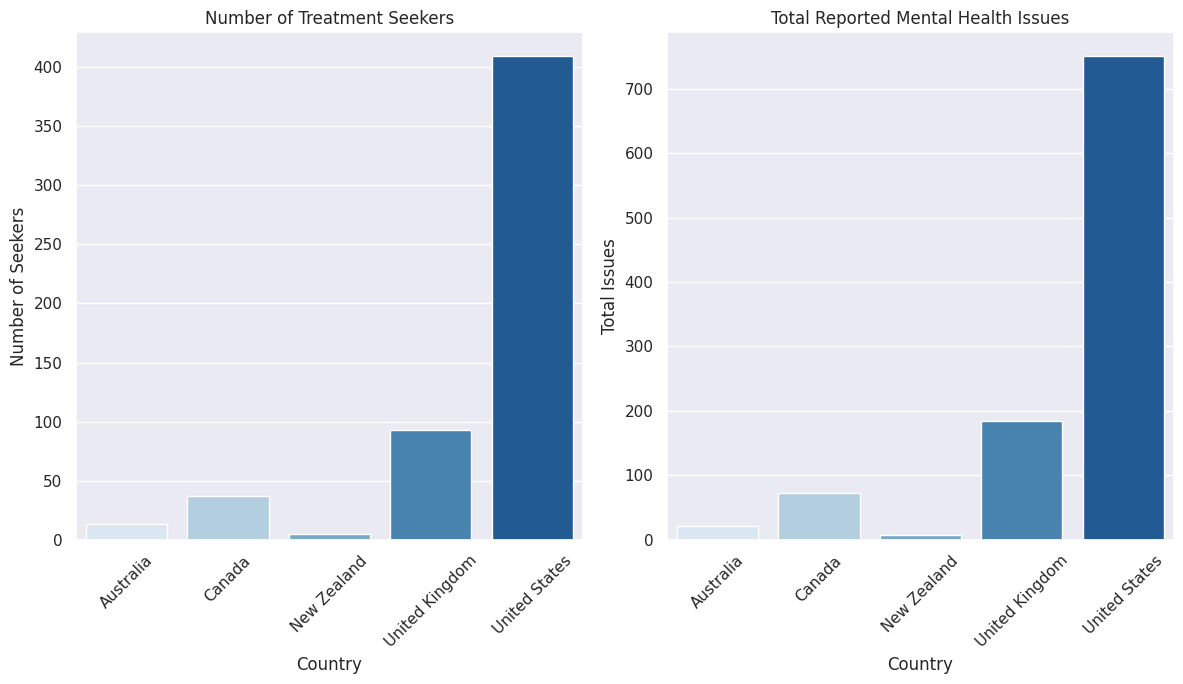

In [ ]:
# Filter data for New Zealand, Australia, the US, Canada, and the UK
countries_to_compare = ['New Zealand', 'Australia', 'United States', 'Canada', 'United Kingdom']
comparison_data = mh[mh['Country'].isin(countries_to_compare)]

# Calculate the total number of reported mental health issues and treatment-seeking behavior
reporting_comparison = comparison_data.groupby('Country').agg(
    total_issues=pd.NamedAgg(column='treatment', aggfunc='count'),
    treatment_seekers=pd.NamedAgg(column='treatment', aggfunc=lambda x: (x == 'Yes').sum())
).reset_index()

# Calculate the proportion of treatment-seekers and the ratio of issues to seekers
reporting_comparison['Seeking Treatment (%)'] = (reporting_comparison['treatment_seekers'] / reporting_comparison['total_issues']) * 100
reporting_comparison['Issues per Seeker'] = reporting_comparison['total_issues'] / reporting_comparison['treatment_seekers']

# Output the results
print(reporting_comparison)

# Plotting treatment-seekers and total issues for comparison
plt.figure(figsize=(12, 7))

# Plot treatment seekers
plt.subplot(1, 2, 1)
sns.barplot(x='Country', y='treatment_seekers', hue='Country', data=reporting_comparison, legend=False, palette='Blues')
plt.title('Number of Treatment Seekers')
plt.xlabel('Country')
plt.ylabel('Number of Seekers')
plt.xticks(rotation=45)

# Plot total reported issues
plt.subplot(1, 2, 2)
sns.barplot(x='Country', y='total_issues', data=reporting_comparison, palette='Blues')
plt.title('Total Reported Mental Health Issues')
plt.xlabel('Country')
plt.ylabel('Total Issues')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

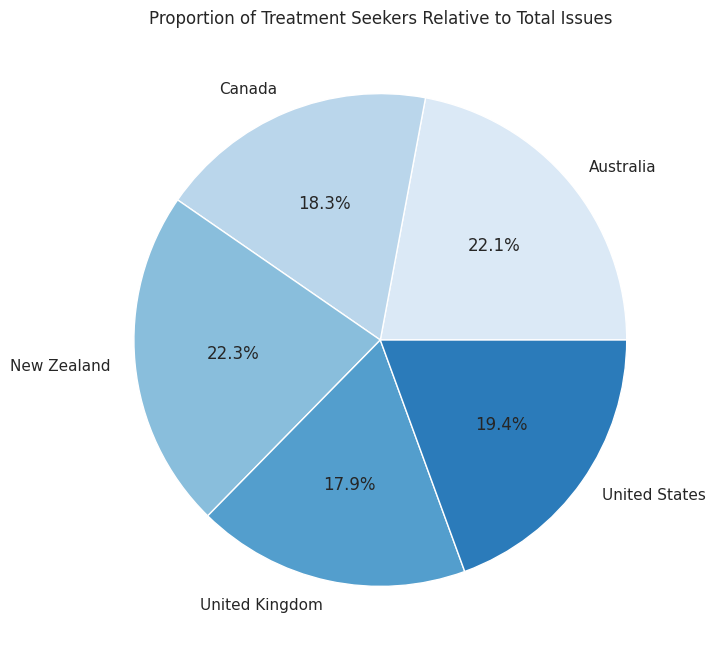

In [ ]:
# Plotting the proportion of treatment seekers to total issues
plt.figure(figsize=(8, 8))
plt.pie(
    reporting_comparison['Proportion_Seeking_Treatment'],  # Use the correct column name
    labels=reporting_comparison['Country'],
    autopct='%1.1f%%',
    colors=sns.color_palette('Blues')
)
plt.title('Proportion of Treatment Seekers Relative to Total Issues')
plt.show()


**Inisght:Australia and New Zealand lead in the proportion of treatment-seekers relative to reported mental health issues, indicating strong engagement with mental health support. In contrast, the USA, UK, and Canada have higher absolute numbers but lower proportional engagement.**

**4.What proportion of the total respondents who have sought mental health treatment come from the top 3 countries, and how does this reflect their influence on the overall treatment landscape in the survey?**

The number of people who actually sought treatment from the top 3 countries: 539
Their proportion from the total number of people who actually sought treatment: 0.85

Breakdown by country:
Country
United States     409
United Kingdom     93
Canada             37
Name: count, dtype: int64


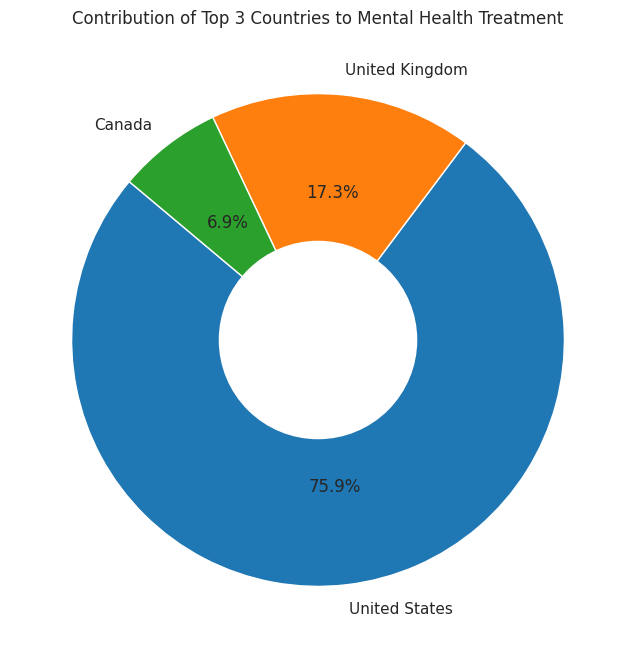

In [ ]:
# Step 1: Calculate the total number of respondents who have sought mental health treatment
total_treated = mh[mh['treatment'] == 'Yes'].shape[0]

# Step 2: Calculate the number of respondents who have sought mental health treatment for each country
treated_by_country = mh[mh['treatment'] == 'Yes']['Country'].value_counts()

# Step 3: Identify the top 3 countries with the highest number of respondents seeking treatment
top_3_countries = treated_by_country.nlargest(3)

# Step 4: Calculate the total number of people from the top 3 countries who sought treatment
top_3_total_treated = top_3_countries.sum()

# Step 5: Calculate the proportion of treatment seekers from the top 3 countries
top_3_contribution = top_3_total_treated / total_treated

# Display the total number of people who sought treatment from the top 3 countries
print(f"The number of people who actually sought treatment from the top 3 countries: {top_3_total_treated}")

# Display the proportion from the total number of people who sought treatment
print(f"Their proportion from the total number of people who actually sought treatment: {top_3_contribution:.2f}")

# Display the breakdown by country
print("\nBreakdown by country:")
print(top_3_countries)

# Create a pie chart and convert it to a donut chart
fig, ax = plt.subplots(figsize=(8, 8))
sizes = top_3_countries.values
labels = top_3_countries.index

# Define a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Create a circle for the donut chart effect
centre_circle = plt.Circle((0, 0), 0.4, color='white', fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Contribution of Top 3 Countries to Mental Health Treatment')
plt.show()

**Inisght: The top 3 countries account for a substantial share of respondents who have sought mental health treatment, highlighting their significant impact on the survey's treatment landscape. This reflects their leading role in addressing mental health issues.**

**5.How does the number of people seeking mental health treatment vary by gender in the top 3 countries, and what is the association between gender and treatment-seeking behavior in these countries?**

Number of people seeking treatment by gender in the top 3 countries:
Gender          female  male  trans
Country                            
Canada              13    23      1
United Kingdom      15    73      5
United States      128   275      6


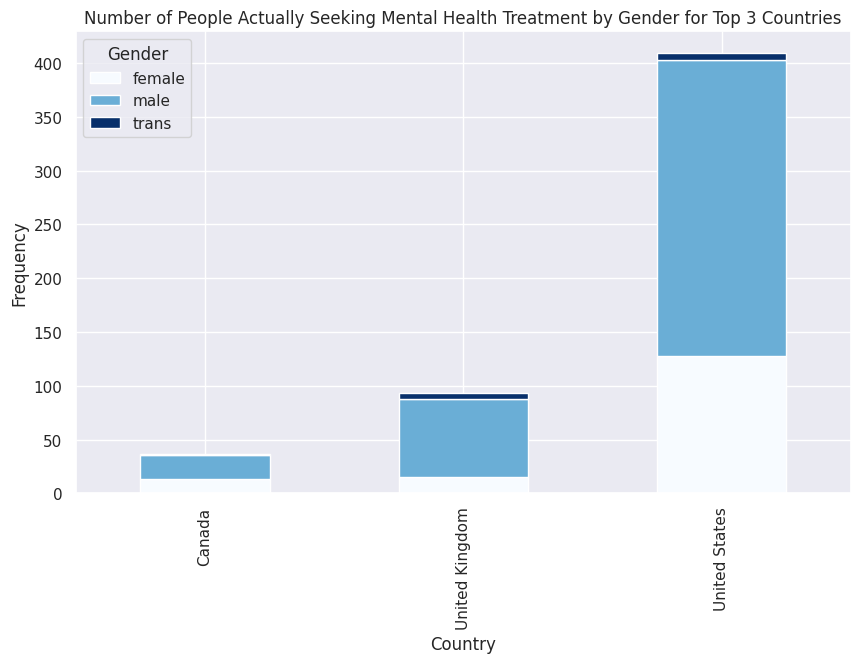

In [ ]:
# Filter the DataFrame to include only the top 3 countries
top_3_countries = ['United States', 'United Kingdom', 'Canada']
filtered_df = mh[mh['Country'].isin(top_3_countries)]

# Calculate the number of people seeking treatment by gender for the top 3 countries
treatment_by_gender = filtered_df[filtered_df['treatment'] == 'Yes'].groupby(['Country', 'Gender']).size().unstack().fillna(0)

# Display the number of people seeking treatment by gender
print("Number of people seeking treatment by gender in the top 3 countries:")
print(treatment_by_gender)

# Stacked bar plot of treatment-seeking by gender for top 3 countries
treatment_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Blues')
plt.title('Number of People Actually Seeking Mental Health Treatment by Gender for Top 3 Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()



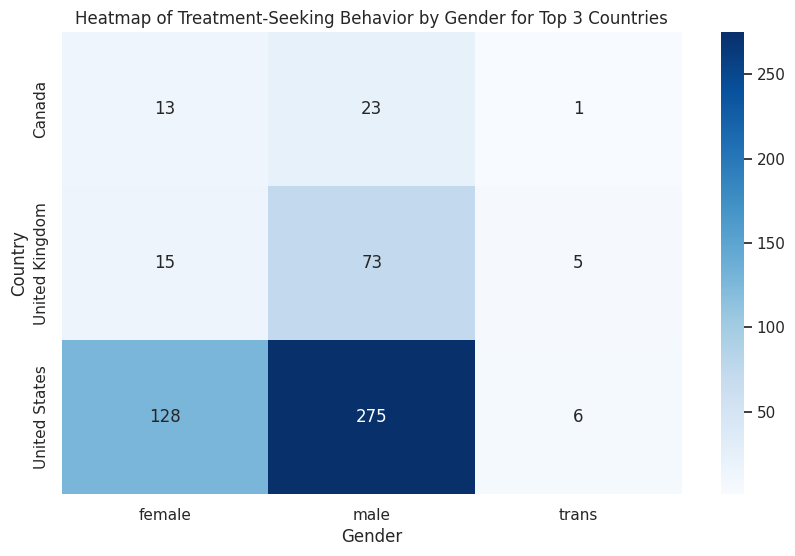

In [ ]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(treatment_by_gender, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title('Heatmap of Treatment-Seeking Behavior by Gender for Top 3 Countries')
plt.xlabel('Gender')
plt.ylabel('Country')
plt.show()


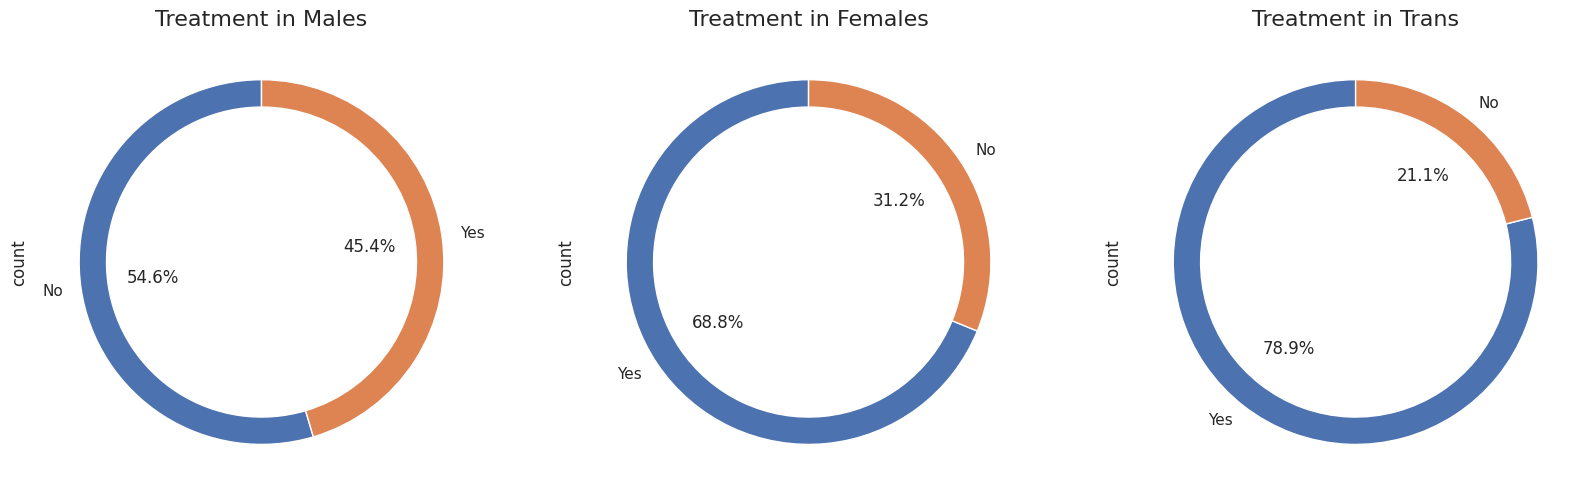

In [ ]:
fig = plt.figure(figsize=[20,10])

plt.subplot(1,3,1)
mh['treatment'][mh['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
mh['treatment'][mh['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)

plt.subplot(1,3,3)
mh['treatment'][mh['Gender'] == 'trans'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Trans', size=16)

plt.show()

**Inisghts: Among the top 3 countries (US, UK, and Canada), treatment-seeking rates are highest for trans individuals (79%), followed by females (69%), and lowest for males (45%). This suggests that gender influences treatment-seeking behavior, with trans individuals accessing mental health services more frequently than their male counterparts.**

**6. Is there a significant relationship between having a family history of mental health issues and the respondent's comfort discussing mental health with their supervisor, and does a family history influence the likelihood of seeking mental health treatment?**

Percentages of comfort discussing mental health with supervisor based on family history:
supervisor         No  Some of them    Yes
family_history                            
No              31.29         27.90  40.81
Yes             31.22         27.76  41.02


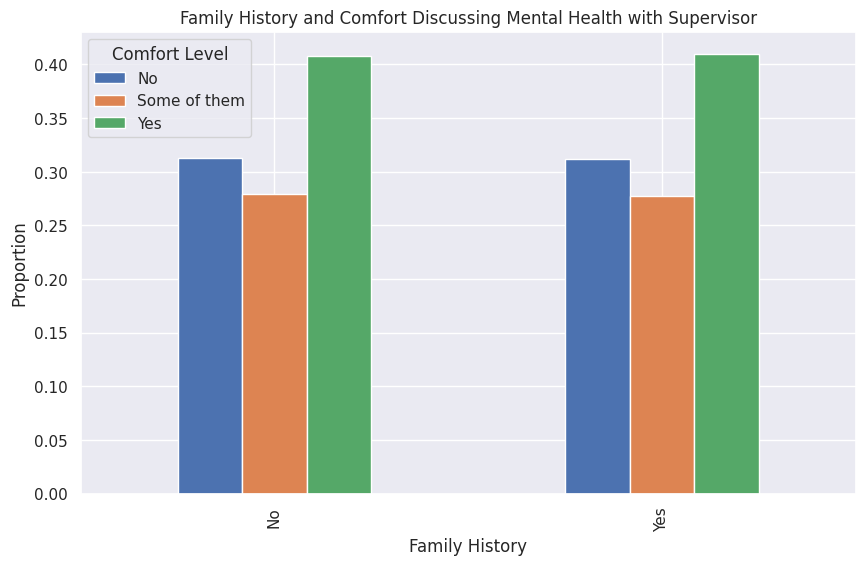

In [ ]:
# Calculate the proportion of responses for each 'Supervisor' category based on 'Family_History'
proportions = mh.groupby('family_history')['supervisor'].value_counts(normalize=True).unstack().fillna(0)

# Convert proportions to percentages
percentages = (proportions * 100).round(2)

# Display the percentages
print("Percentages of comfort discussing mental health with supervisor based on family history:")
print(percentages)

mh.groupby('family_history')['supervisor'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Family History and Comfort Discussing Mental Health with Supervisor')
plt.xlabel('Family History')
plt.ylabel('Proportion')
plt.legend(title='Comfort Level')
plt.show()


In [ ]:
mh['family_history'].value_counts()

,count
family_history,
No,767
Yes,490


In [ ]:
mh.groupby(['treatment','family_history'])['family_history'].count()['No']

,family_history
family_history,
No,495
Yes,127


In [ ]:
mh.groupby(['treatment','family_history'])['family_history'].count()['Yes']

,family_history
family_history,
No,272
Yes,363


Text(0.5, 1.0, 'Treatment vs Family History')

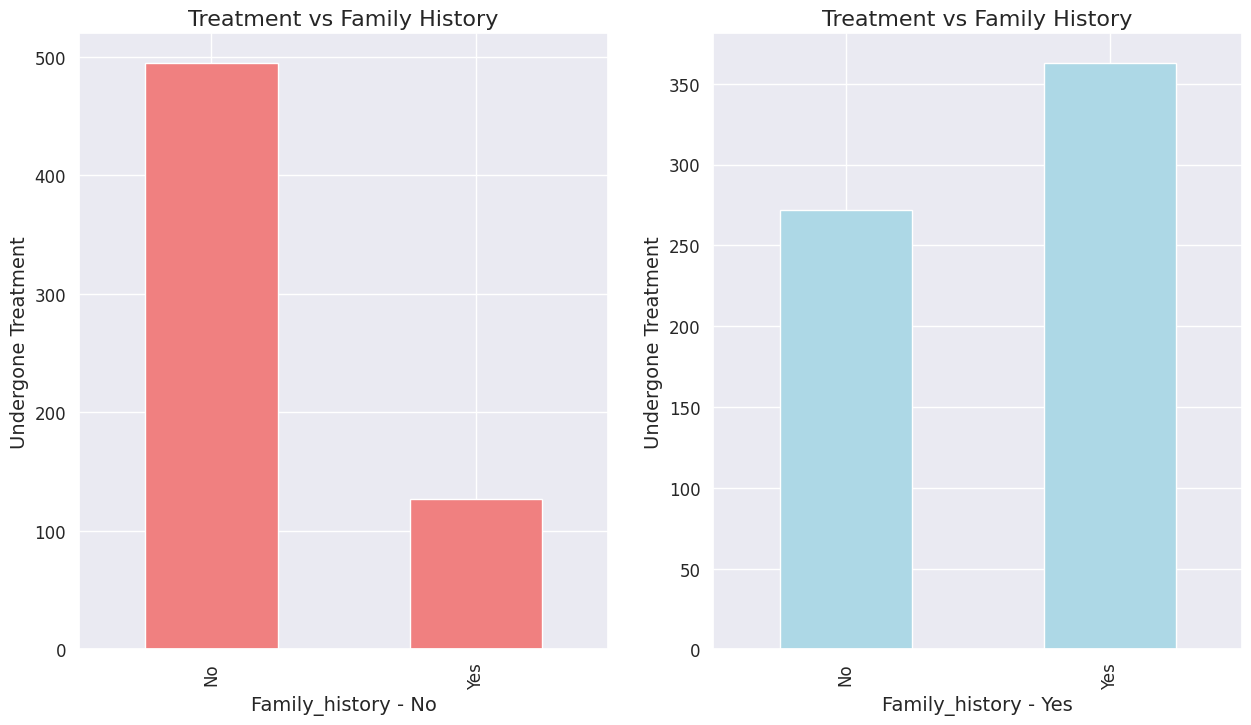

In [ ]:
figure = plt.figure(figsize=[15, 8])

plt.subplot(1,2,1)
mh.groupby(['treatment','family_history'])['family_history'].count()['No'].plot.bar(color='lightcoral')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Family_history - No', size=14)
plt.ylabel(ylabel='Undergone Treatment', size=14)
plt.title(label='Treatment vs Family History', size=16)

plt.subplot(1,2,2)
mh.groupby(['treatment','family_history'])['family_history'].count()['Yes'].plot.bar(color='lightblue')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Family_history - Yes', size=14)
plt.ylabel(ylabel='Undergone Treatment', size=14)
plt.title(label='Treatment vs Family History', size=16)

**Inisght: There is minimal difference in comfort levels discussing mental health with a supervisor based on family history. However, employees with a family history are slightly more likely to seek treatment, suggesting higher awareness of mental health care.**

**7. How does work interference due to mental health issues vary by company size, and what is the relationship between seeking treatment and perceived work interference? Additionally, what is the distribution of work interference levels among employees in the top 3 countries?**

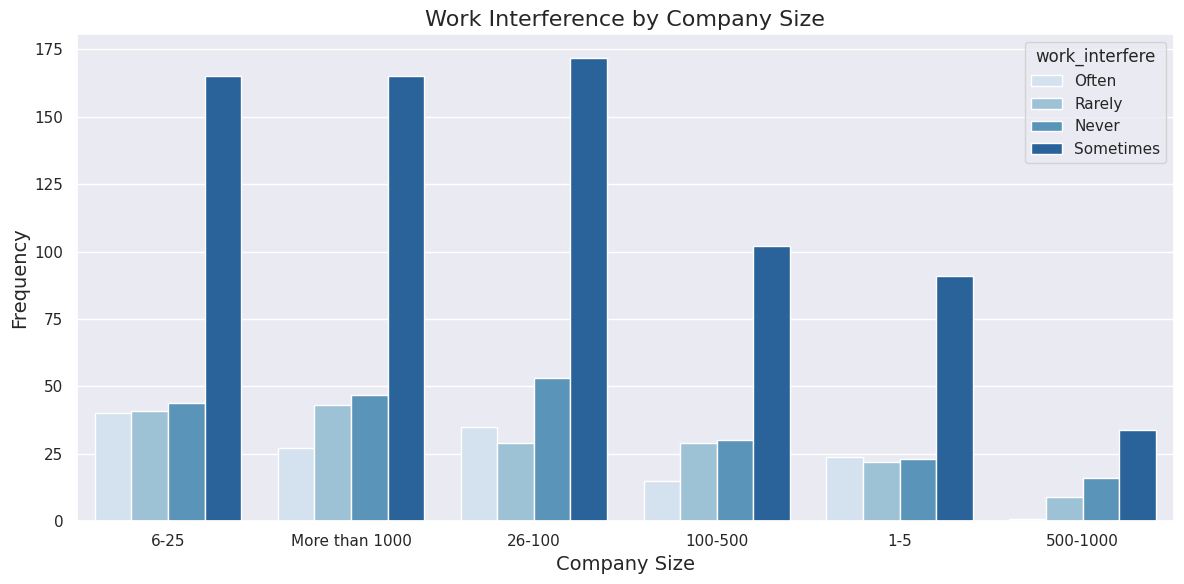

In [ ]:
#For Work Interference by Company Size
plt.figure(figsize=(12, 6))

# Work Interference by Company Size
sns.countplot(data=mh, x='no_employees', hue='work_interfere', palette='Blues')
plt.title('Work Interference by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


In smaller and mid-sized companies with 6-25 and 26-100 employees frequently experience work interference due to mental health issues, highlighting a need for better mental health support systems.

In [ ]:
mh['treatment'].value_counts()

,count
treatment,
Yes,635
No,622


In [ ]:
mh['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,729
Never,213
Rarely,173
Often,142


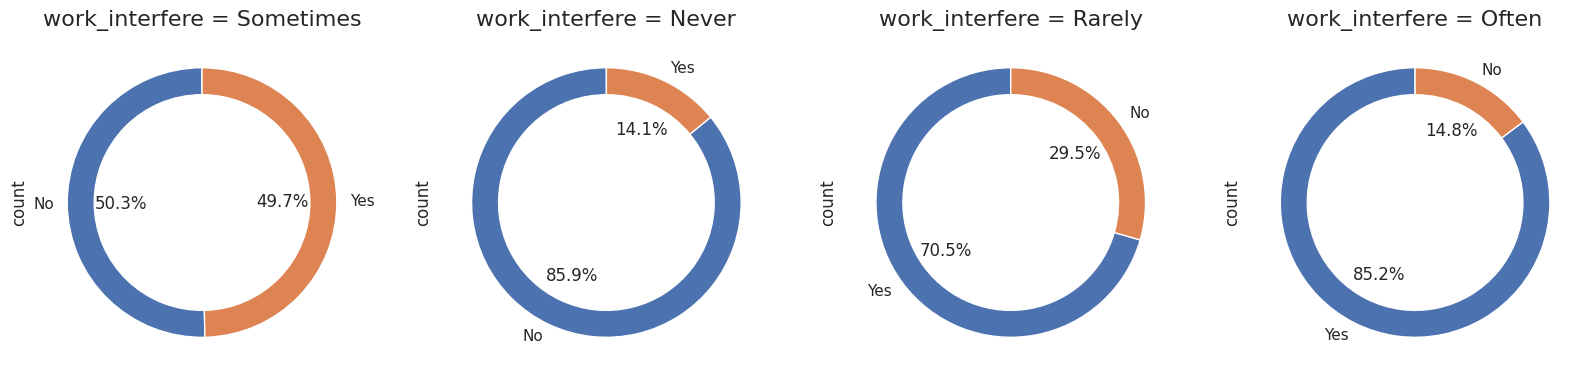

In [ ]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,4,1)
mh['treatment'][mh['work_interfere'] == 'Sometimes'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Sometimes', size=16)

plt.subplot(1,4,2)
mh['treatment'][mh['work_interfere'] == 'Never'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Never', size=16)

plt.subplot(1,4,3)
mh['treatment'][mh['work_interfere'] == 'Rarely'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Rarely', size=16)

plt.subplot(1,4,4)
mh['treatment'][mh['work_interfere'] == 'Often'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Often', size=16)

plt.show()

We can observe that employees who are more 'Often' & 'Rarely' interfered during work are likely to have Mental health issues and hence are seeking Treatment.

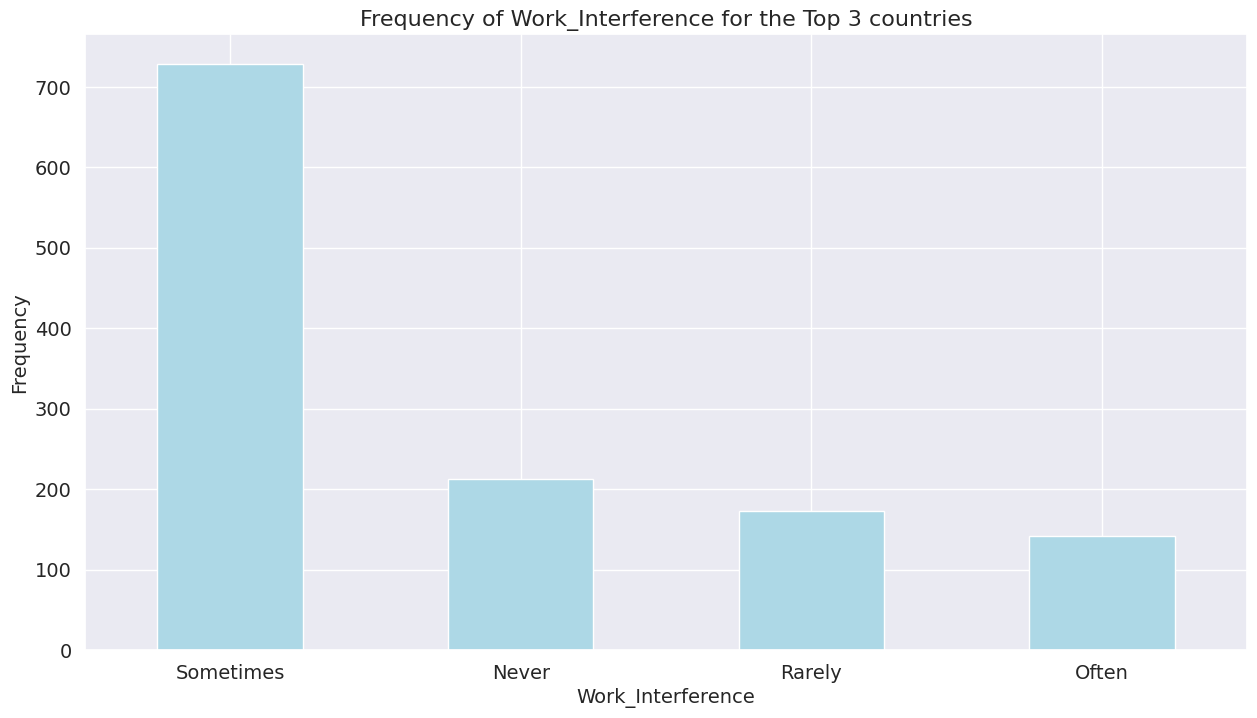

In [ ]:
# Frequency Distribution of Work Interference in Top 3 Countries
mh['work_interfere'].value_counts()
figure = plt.figure(figsize=(15,8))

mh['work_interfere'].value_counts().plot.bar(color='lightblue')
plt.xticks(rotation=0, size=14)
plt.yticks(size=14)
plt.xlabel(xlabel= 'Work_Interference', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label= 'Frequency of Work_Interference for the Top 3 countries', size=16)
plt.grid(True)

plt.show()

The majority of individuals seeking treatment for their mental health issues experienced interference with their work at times.

**Insight: In smaller and mid-sized companies (6-25 and 26-100 employees), frequent work interference due to mental health issues highlights the need for better support systems. Employees experiencing more interference are more likely to seek treatment, indicating a strong link between work interference and mental health challenges.**

**8.How does age influence awareness of an employer's mental health attitude and its impact on mental health-related behaviors?**

In [ ]:
def attitude(x):
  """A custom function to map values in a feature."""

  if x == 'No':
    return 'Positive'
  elif x == 'Yes':
    return 'Negative'
  elif x == 'Maybe':
    return 'Moderate'
  else:
    return x

In [ ]:
mh.loc['attitudes'] = mh['mental_health_consequence'].apply(attitude)
mh['attitudes'].value_counts()

,count
attitudes,
Positive,490
Moderate,477
Negative,290


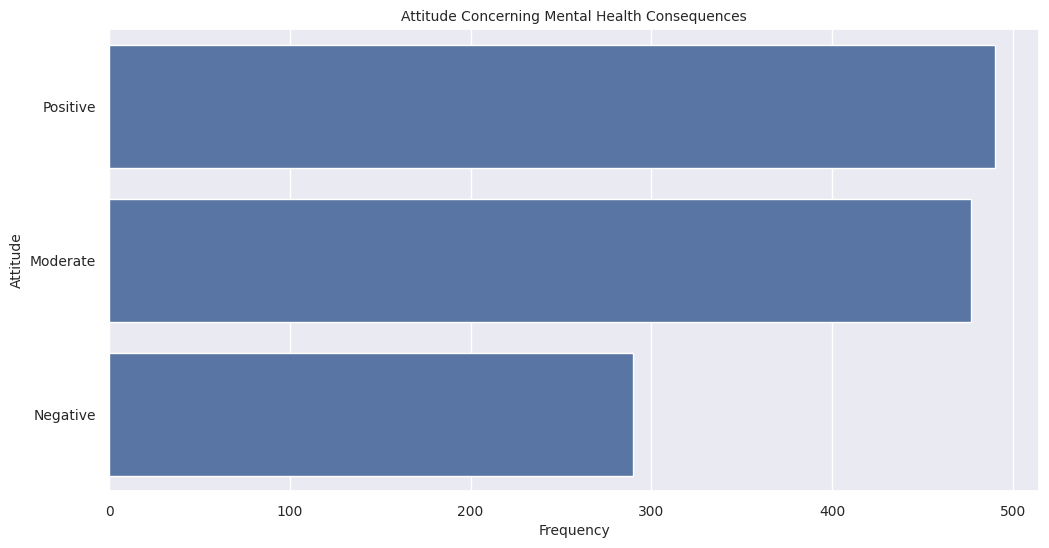

In [ ]:
figure = plt.figure(figsize=[12, 6])

sns.countplot(y='attitudes', data=mh)

plt.title(label='Attitude Concerning Mental Health Consequences', size=10)
plt.xlabel(xlabel='Frequency', size=10)
plt.ylabel(ylabel='Attitude', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
#plt.grid(b=True)

plt.show()

The majority of individuals perceive their employers' attitudes to be more positive or moderately supportive rather than negative when addressing their mental health concerns.

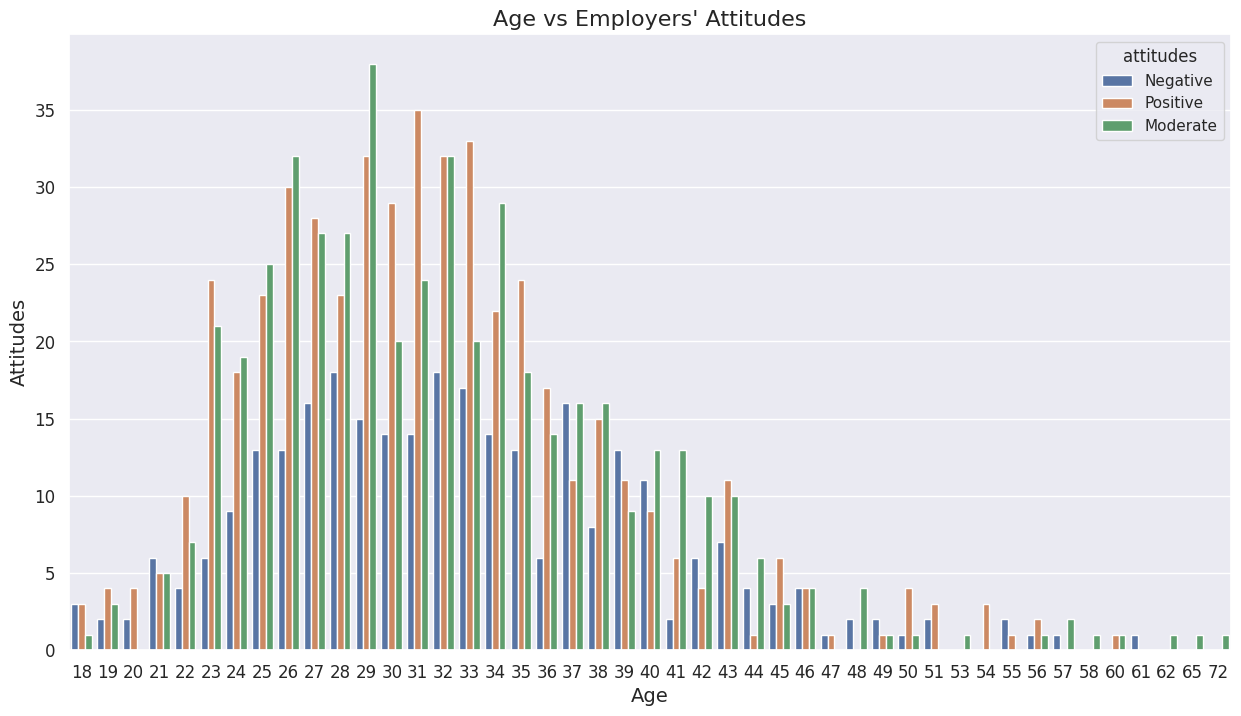

In [ ]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='attitudes', data=mh)

plt.title(label="Age vs Employers' Attitudes", size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Attitudes', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.grid(b=True)

plt.show()

This suggests that individuals in their mid-20s to mid-30s perceive their employers' attitude to be more positive or moderately supportive rather than negative when they discuss their mental health concerns.

**Insight: Most individuals view their employers' attitudes towards mental health as positive or moderately supportive. This perception is particularly strong among those in their mid-20s to mid-30s.**

**9.Do respondents who believe mental health is taken less seriously than physical health report more negative consequences for discussing mental health?**

In [ ]:
mh.groupby('mental_vs_physical')['mental_health_consequence'].value_counts(normalize=True)

mental_vs_physical  mental_health_consequence
Don't know          Maybe                        0.460069
                    No                           0.342014
                    Yes                          0.197917
No                  Yes                          0.458824
                    Maybe                        0.373529
                    No                           0.167647
Yes                 No                           0.692082
                    Maybe                        0.249267
                    Yes                          0.058651
Name: proportion, dtype: float64

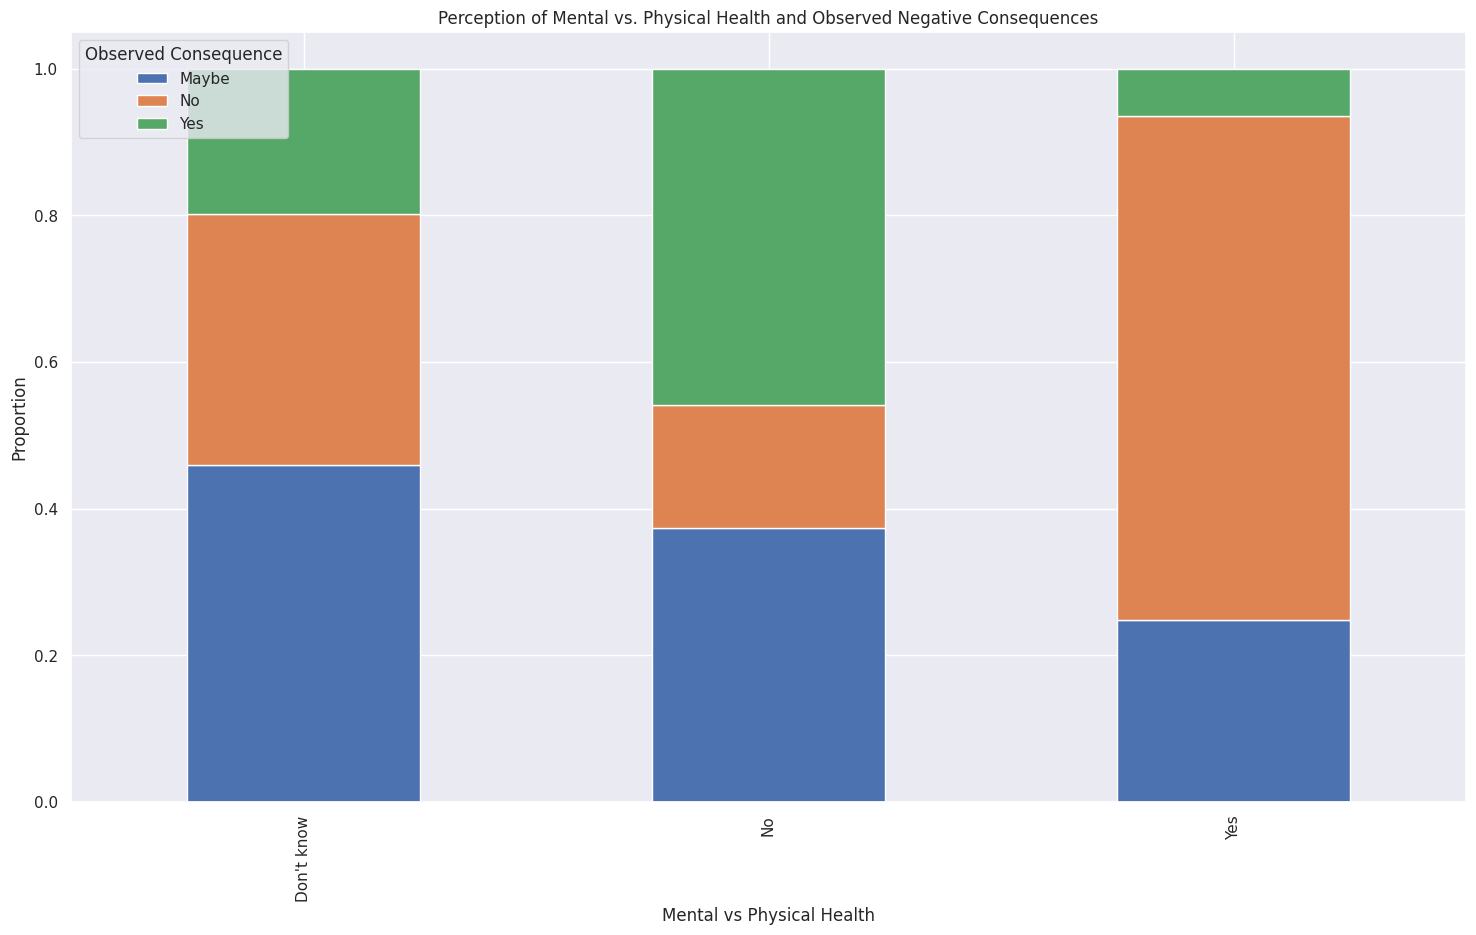

In [28]:
mh.groupby('mental_vs_physical')['mental_health_consequence'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(18, 10))
plt.title('Perception of Mental vs. Physical Health and Observed Negative Consequences')
plt.xlabel('Mental vs Physical Health')
plt.ylabel('Proportion')
plt.legend(title='Observed Consequence')
plt.show()



**Insights: It indicates that individuals who view mental health as more crucial than physical health tend to acknowledge mental health consequences more frequently.**